In [ ]:
!pip install requests
!pip install html
!pip install bs4
!pip install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=94b49e21508bf8a395bd81a3aa6796fae1931c484fade3e03624dd0be023c26b
  Stored in directory: /root/.cach

In [ ]:
import urllib.request  # handling the url
from bs4 import BeautifulSoup  #handling or parsing the html file

response=urllib.request.urlopen("https://en.wikipedia.org/wiki/Nikola_Tesla")
htmlFormat=response.read()
htmlFormat

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Nikola Tesla - Wikipedia</title>\n<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";(function(){var cookie=document.cookie.match(/(?:^|; )enwikimwclien

In [ ]:
soup=BeautifulSoup(htmlFormat,"html5lib")
text=soup.get_text(strip=True)
tokens=[t for t in text.split()]
tokens

['Nikola',
 'Tesla',
 '-',
 'Wikipediadocument.documentElement.className="client-js',
 'vector-feature-language-in-header-enabled',
 'vector-feature-language-in-main-page-header-disabled',
 'vector-feature-sticky-header-disabled',
 'vector-feature-page-tools-pinned-disabled',
 'vector-feature-toc-pinned-enabled',
 'vector-feature-main-menu-pinned-disabled',
 'vector-feature-limited-width-enabled',
 'vector-feature-limited-width-content-enabled',
 'vector-feature-zebra-design-disabled";(function(){var',
 'cookie=document.cookie.match(/(?:^|;',
 ')enwikimwclientprefs=([^;]+)/);if(cookie){var',
 'featureName=cookie[1];document.documentElement.className=document.documentElement.className.replace(featureName+\'-enabled\',featureName+\'-disabled\');}}());RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","Novembe

In [ ]:
import requests
import bs4
res=requests.get("http://quotes.toscrape.com/")
res.text
soup=bs4.BeautifulSoup(res.text,'lxml')
soup.select(".author")

[<small class="author" itemprop="author">Albert Einstein</small>,
 <small class="author" itemprop="author">J.K. Rowling</small>,
 <small class="author" itemprop="author">Albert Einstein</small>,
 <small class="author" itemprop="author">Jane Austen</small>,
 <small class="author" itemprop="author">Marilyn Monroe</small>,
 <small class="author" itemprop="author">Albert Einstein</small>,
 <small class="author" itemprop="author">André Gide</small>,
 <small class="author" itemprop="author">Thomas A. Edison</small>,
 <small class="author" itemprop="author">Eleanor Roosevelt</small>,
 <small class="author" itemprop="author">Steve Martin</small>]

In [ ]:
authors=set()
for name in soup.select(".author"):
  authors.add(name.text)
authors

{'Albert Einstein',
 'André Gide',
 'Eleanor Roosevelt',
 'J.K. Rowling',
 'Jane Austen',
 'Marilyn Monroe',
 'Steve Martin',
 'Thomas A. Edison'}

In [ ]:
quotes=[]
for quote in soup.select(".text"):
  quotes.append(quote.text)
quotes

['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”',
 '“It is our choices, Harry, that show what we truly are, far more than our abilities.”',
 '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”',
 '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”',
 "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”",
 '“Try not to become a man of success. Rather become a man of value.”',
 '“It is better to be hated for what you are than to be loved for what you are not.”',
 "“I have not failed. I've just found 10,000 ways that won't work.”",
 "“A woman is like a tea bag; you never know how strong it is until it's in hot water.”",
 '“A day without sunshine is like, you know, night.”']

In [ ]:
soup=bs4.BeautifulSoup(res.text,"lxml")
soup.select(".tag-item")
for item in soup.select(".tag-item"):
  print(item.text)


love


inspirational


life


humor


books


reading


friendship


friends


truth


simile



Working with IMAGES

In [ ]:
from PIL import Image
img=Image.open('me.jpg')
print(img.size)
img


In [ ]:
import cv2
import imutils
img=cv2.imread("me.jpg")  #bread an image
resizeImg=imutils.resize(img,width=500)  #resizing an image
cv2.imwrite("resizedImage.jpg",resizeImg) #saving image

True

(500, 1111)


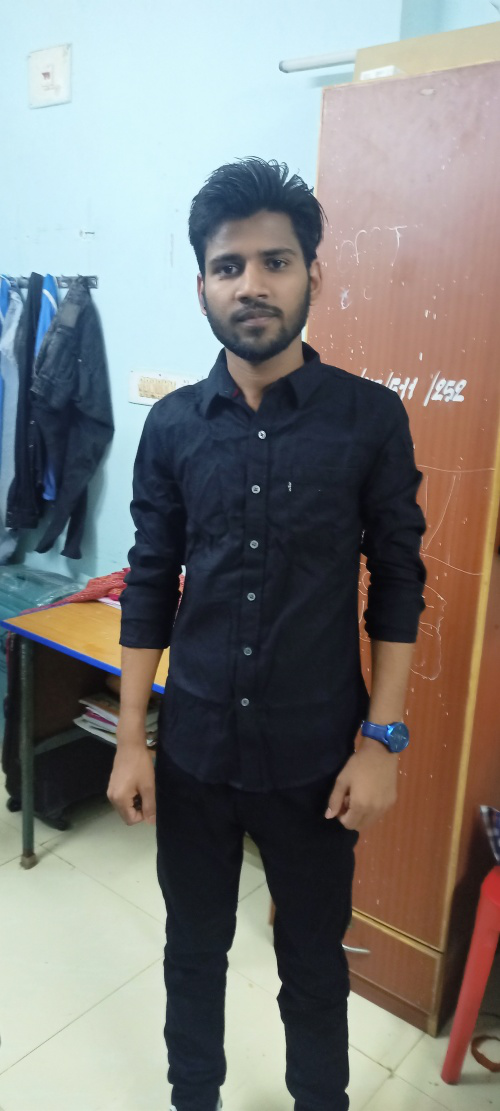

In [ ]:
from PIL import Image
img=Image.open('resizedImage.jpg')
print(img.size)
img


Bluring or smoothing an Image

In [ ]:
import cv2
img=cv2.imread('me.jpg')
gaussianBlurImg=cv2.GaussianBlur(img,(21,21),0)
cv2.imwrite("gaussianImage.jpg",gaussianBlurImg)

True

(2016, 4480)


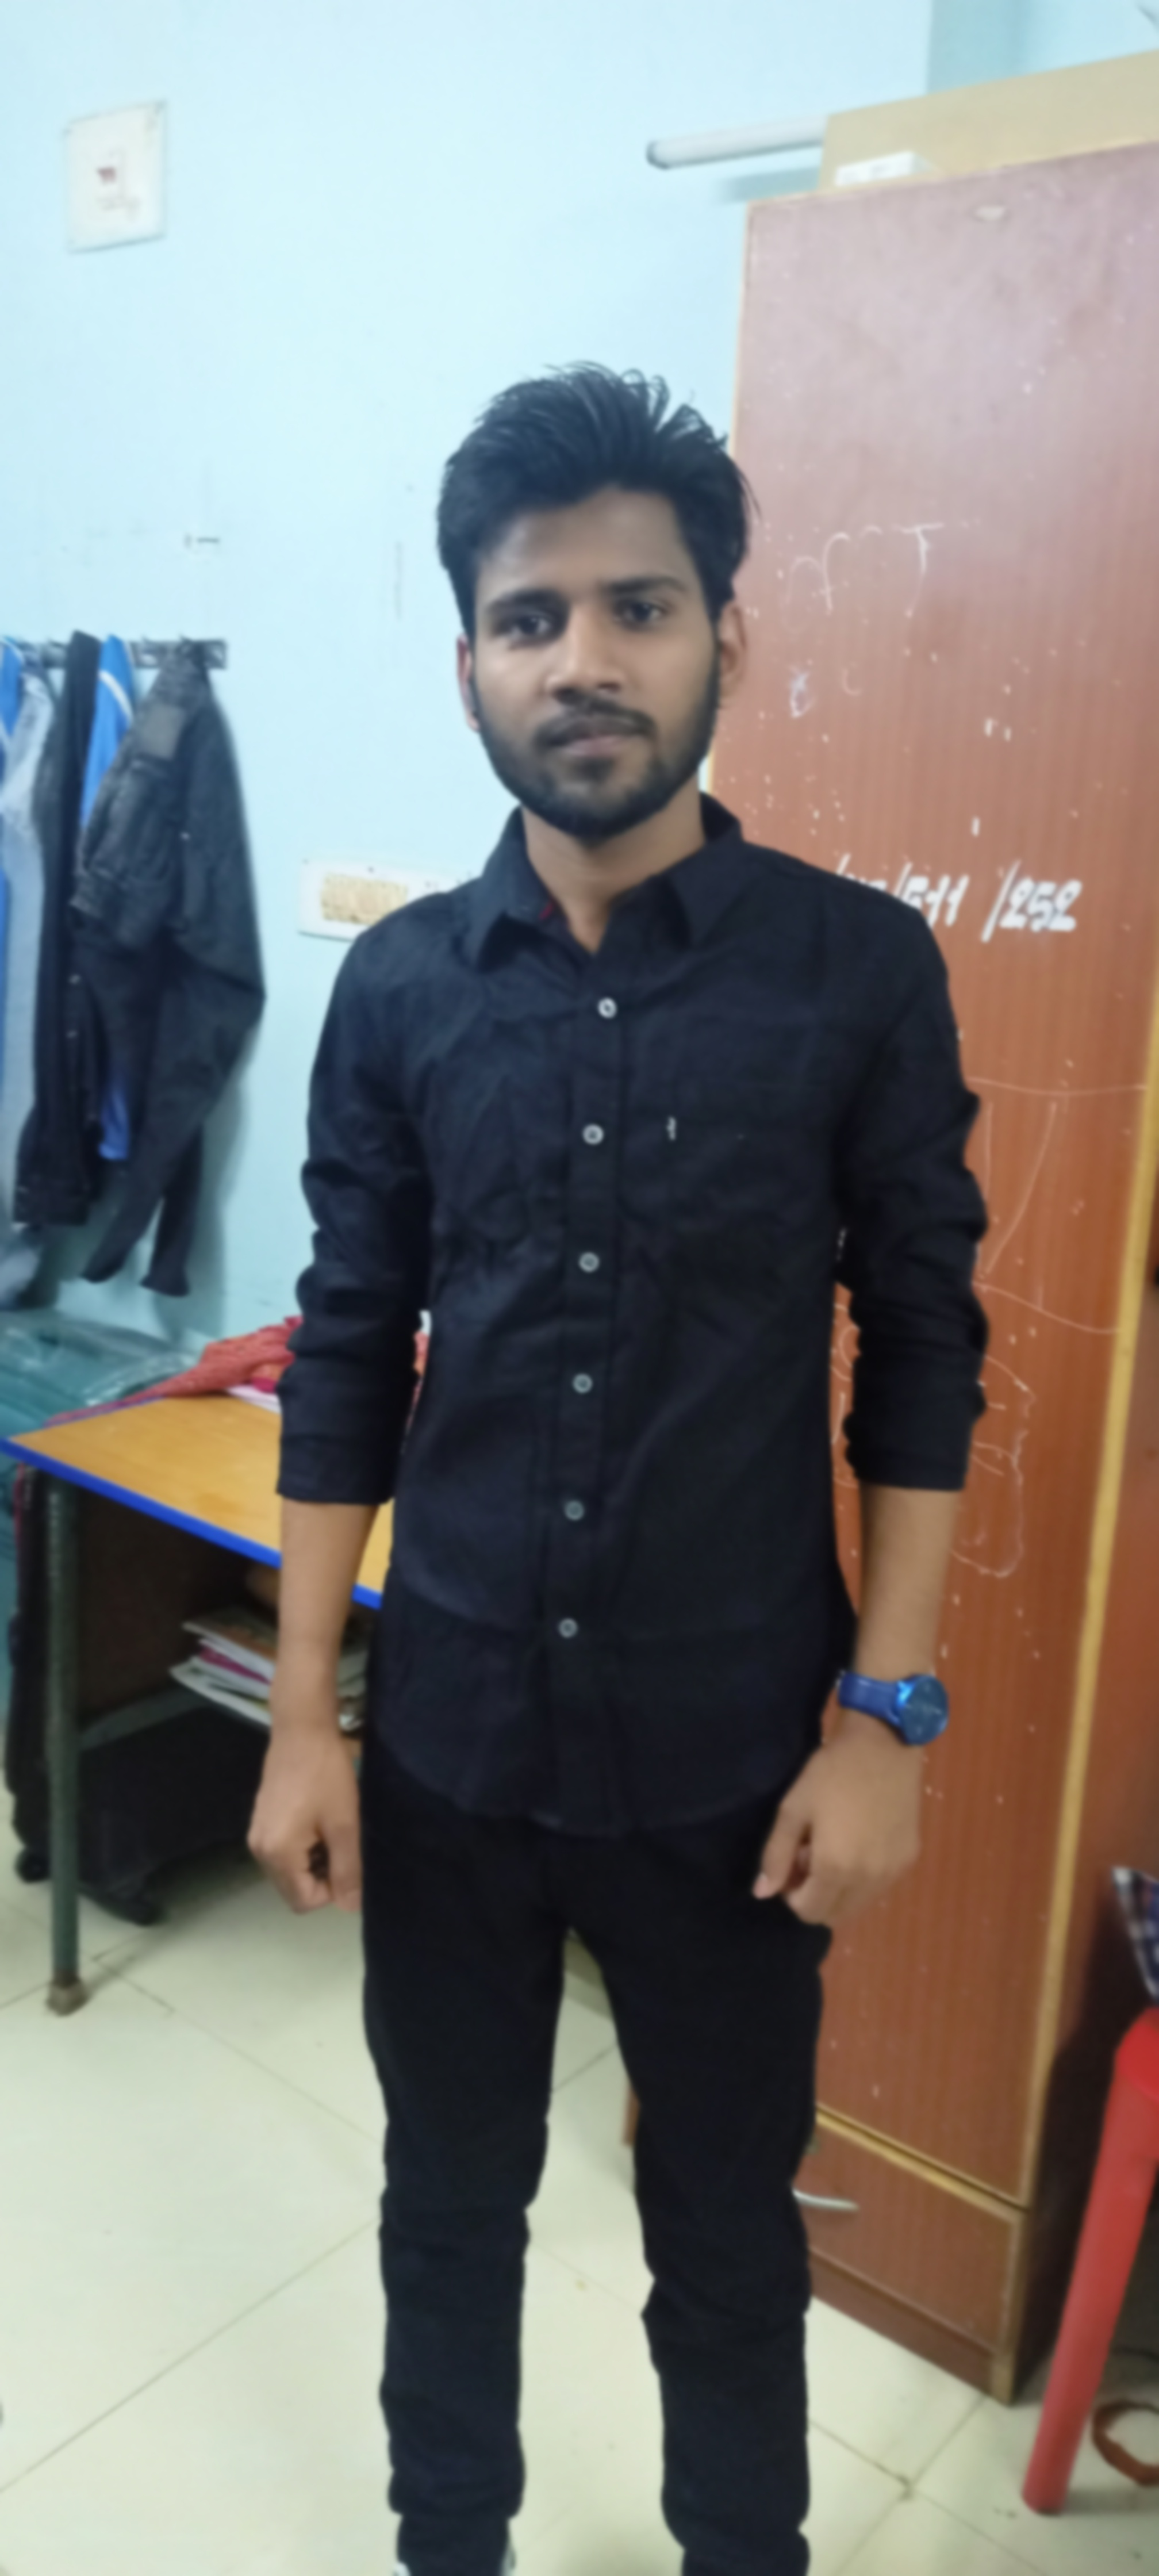

In [ ]:
from PIL import Image
img=Image.open('gaussianImage.jpg')
print(img.size)
img


Convert the color image into gracekel image

In [ ]:
import cv2
img=cv2.imread('me.jpg')
grayImg=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
threshImg=cv2.threshold(grayImg,200,255,cv2.THRESH_BINARY)[1]
cv2.imwrite("thresholdImage.jpg",threshImg)

True

(330, 653)


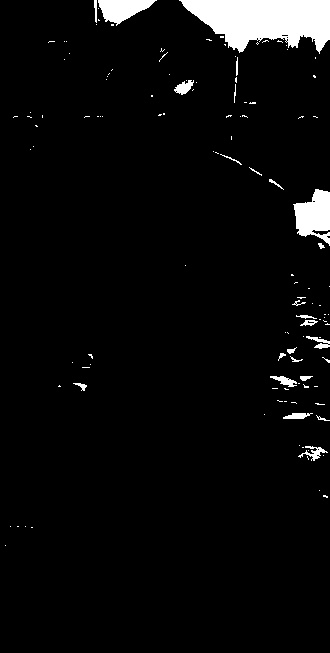

In [ ]:
from PIL import Image
img=Image.open('thresholdImage.jpg')
print(img.size)
img


In [ ]:
!pip install imutils
import urllib.request
import cv2
import numpy as np
import imutils

url="http://10.137.93.5:8080/shot.jpg"
while True:
  imgPath=urllib.request.urlopen(url)
  imgNp=np.array(bytearray(imgPath.read()),dtype=np.uint8)
  img=cv2.imdecode(imgNp,-1)
  img=imutils.resize(img,width=450)
  cv2.imshow("CameraFeed",img)
  if ord('q')== cv2.waitKey(1):
    exit(0)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


URLError: ignored